<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%8D%B0%EB%A7%88%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C1%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RQ1. 과적합을 방지하고 비용을 줄이기 위한 효율적인 변수선택 및 데이터 축소방법

바야흐로, 데이터의 홍수라고 불리우는 빅데이터의 시대가 도래했다.
사실, 빅데이터의 시대에서는 데이터의 부족보다는 수 많은 잡음이 섞인 데이터셋 사이에서 예측 혹은 분석에 필요한 데이터만을 고르고 이에 맞는 피쳐를 엔지니어링 하는 기술이 점점 더 중요해지고 있는 실정이다.

머신러닝을 다루는 데에 있어서 가장 기본적이고 표준이 되는 모델은 아마 선형회귀 일 것이다. 선형회귀모델을 바탕으로 머신러닝모델들의 결과를 비교해서, 블랙박스라고 불리우는 머신러닝 모델이 얼마나 효율이 좋아지는지 또, 그 예측력은 어떠한지에 대한 비교를 하기 위함인 것이다.

이때 선형회귀를 함에 있어서 가장 빈번하게 나타나는 문제는 과소적합, 과대적합 이 두 가지로 일축할 수 있다. 전자는 데이터셋의 복잡성을 선형회귀로 나타내기에 학습이 충분하지 않을때 발생하는 현상이고, 후자는 모델이 훈련 데이터셋에만 치중되었기 때문에 실제 데이터셋에서 별다른 효력을 발휘하지 못하는 현상이다.

또한, 모델을 학습시키는데에 있어서 데이터양이 방대해질 수록 시간이라는 비용이 점점 중요한 자원으로 작용한다. 그렇기 때문에 데이터 과적합 문제와 더불어서, 효율적인 변수만을 골라 시간을 단축시키는 기술은 필수불가결이라 할 수 있다.

이에, 우리는 전진선택법, 후진소거법, 단계선택법, 라쏘/엘라스틱넷 변수선택법을 통해서 가장 기본이 되는 모델인 선형회귀모델의 효율적인 변수선택과 과적합 방지를 위한 목적으로 다음과 같은 분석을 실시하였다.

준비된 데이터셋은 총 170개 정도의 피쳐들이 있는 데이터 셋이며, 과연 170개의 피쳐들중에서 각 단계마다 얼마나 효율적으로 피쳐 선택이 가능하며, 이에 따른 RMSE나 결정계수가 얼마나 증진되는지 살펴보고자 한다.

선형회귀에서 과적합의 유무는 결정계수로 살펴볼 수 있고, 예측력의 변화는 RMSE로 살펴보고자 한다.

# 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 데이터 불러오기

타겟 변수와 170개의 설명변수를 포함해서 총 171개의 피쳐가 있다.(모두 연속형)

In [2]:
data=pd.read_csv('./train_data.csv')
data=data.drop(['id'],axis=1)
data

,target1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,...,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.134
1,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,...,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.554,-0.622,-1.214,0.389,0.136,1.035,0.101,-1.592,-0.552,1.145,0.587,1.117,-0.645,1.022,0.639,0.968,0.176,-1.132,0.119,0.428,-1.739,0.758,-1.445,0.916,-0.366,-1.132
2,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,-0.017,-0.665,1.905,0.376,-1.373,1.587,1.464,-1.550,-0.512,0.508,-0.094,-0.114,-0.425,0.104,0.643,-1.371,1.553,-0.062,-0.173,-0.465,-1.252,0.443,2.205,-1.266,-0.739,0.827,-1.306,0.274,-1.573,-2.011,-1.228,...,-0.019,0.568,0.083,-1.295,-0.312,0.252,0.325,-0.075,0.168,-0.520,0.124,0.677,1.865,-0.405,1.918,-0.847,0.819,-0.405,-0.102,1.879,-2.472,0.559,-0.307,0.186,-1.425,-0.379,0.443,-0.887,0.868,-0.914,0.178,2.272,-0.220,0.355,1.122,1.518,-0.824,1.461,-1.124,-1.189
3,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,-0.638,0.760,-0.360,-2.048,-0.996,-0.361,0.962,0.021,0.595,-0.943,0.069,0.483,-0.063,-0.540,-0.551,-1.736,-2.014,0.636,-1.147,-0.767,-0.678,0.815,1.696,-0.436,-1.777,0.548,0.318,0.978,1.299,-0.540,0.248,...,0.401,-0.287,0.552,-0.112,1.261,0.323,0.511,-0.221,-0.593,1.117,-2.027,-0.108,-1.131,-0.871,1.177,-0.065,1.142,0.280,-0.806,-1.176,0.908,1.831,0.151,-1.386,-0.752,1.923,-1.216,0.995,-0.162,1.560,-0.787,-1.460,1.170,-1.188,2.634,1.044,-0.699,1.283,0.366,1.188
4,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,-0.499,-0.653,-0.058,-0.046,0.654,-0.697,-1.175,0.720,0.484,0.402,-1.037,1.081,0.716,-0.144,1.720,-1.980,-0.741,-1.493,-0.860,-0.082,0.133,1.084,-0.719,0.198,1.144,1.123,0.435,-0.296,-2.933,0.831,1.905,...,2.564,-0.646,0.209,-1.968,0.462,2.042,-1.328,0.991,-0.167,-0.066,-0.866,-0.582,-1.644,-0.380,0.703,-0.869,-0.617,0.987,0.990,-0.980,0.110,-1.486,-1.458,-1.369,-0.349,1.564,-0.385,-1.240,-1.144,-1.880,-0.408,-0.422,-1.588,0.517,-0.381,-1.308,-1.014,-0.999,0.519,1.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,1.416,0.149,-0.194,0.552,-0.073,-1.353,-1.485,0.368,0.110,-0.367,-1.833,0.414,0.664,0.956,-1.941,-0.868,0.522,-1.463,-1.148,0.107,-1.592,-0.944,-0.238,-1.372,-3.606,1.378,-1.453,-0.286,0.322,-0.638,1.612,...,1.048,2.560,-0.584,0.562,0.036,-1.062,-0.520,-1.371,0.086,1.292,-0.022,0.711,-0.742,-0.576,0.093,1.029,0.401,1.042,-0.976,0.927,1.751,-0.802,1.271,-1.085,-0.446,-0.680,0.350,-0.747,1.288,-0.016,-0.237,0.338,-0.571,-0.405,0.674,0.765,-1.129,0.866,-0.986,-0.171
246,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,-0.569,0.725,-0.262,0.647,-0.529,1.145,-0.279,-0.955,-1.184,-0.598,-0.865,0.237,0.732,-0.925,1.473,0.573,-0.796,-0.558,-0.862,1.235,-0.965,-0.391,0.525,-1

# 결측값 조사
결측값은 없다.

In [3]:
data.isnull().sum().sum()

0

# 훈련, 테스트 데이터셋으로 분할하는 과정
테스트 데이터 사이즈는 30%로 한다.

In [4]:
x_train, x_test, y_train, y_test= train_test_split(data.drop(['target1'],axis=1),data['target1'], test_size=0.3, random_state=35)

# 훈련, 테스트 데이터셋 완성하기

In [5]:
train_set=pd.concat([y_train,x_train],axis=1)
test_set=pd.concat([y_test,x_test],axis=1)

# Initial variance를 선택하기 위해서 상관계수를 살펴본다.

In [6]:
data_corr=pd.DataFrame(train_set.corr().iloc[0])
data_corr=data_corr.drop(['target1'],axis=0)
data_corr=abs(data_corr)
data_corr

,target1
1,0.020032
2,0.096899
3,0.137090
4,0.066852
5,0.103326
...,...
166,0.106478
167,0.046483
168,0.085026
169,0.042001


# 가장 높은 상관계수는 무엇일까?

In [121]:
data_corr[data_corr['target1'] == data_corr['target1'].max()]

,target1
86,0.235115


# 실제로 그런지 확인해보기

In [122]:
# 실제로 그런지 확인해보기
print(data_corr.loc['86'])
print(data_corr.max())

target1    0.235115
Name: 86, dtype: float64
target1    0.235115
dtype: float64


# 전진 선택법

초기 변수로 상관계수가 가장 높게 나온 변수를 선택한다.
그 이후에 하나씩 변수를 넣어주면서 검정통계량을 통해 기각 유무를 결정한다.
그리고 그것을 통해 선택된 변수가 들어오게 되면, 결정계수와 테스트 데이터셋을 통한 RMSE를 살펴보고 어떤 변화가 있는지 살펴본다.

In [9]:
# 전진선택법
data2=train_set.copy()
data_forward=test_set.copy()
data_corr2=abs(data_corr)
forward=pd.DataFrame()
forward1=pd.DataFrame()
for num in range(1,int(len(data2.T))):
  if num == 1 :
    data_corr2=pd.DataFrame(data2.corr().iloc[0])
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_forward[cor])
    model=sm.OLS(data2['target1'],variable).fit()
    if model.pvalues.values[-1] >= 0.05:
      data2=data2.drop([cor],axis=1)
    else:
      forward_predict = model.predict(variable1)
      forward_r2=model.rsquared
      forward_rmse=np.sqrt(np.mean((test_set['target1'] - forward_predict) ** 2 ))
      print('초기변수의 결정계수 :', forward_r2)
      print('초기변수의 RMSE :', forward_rmse)
      print()
      forward=pd.concat([forward,variable], axis=1)
      forward1=pd.concat([forward1,variable1], axis=1)
      data2=data2.drop([cor],axis=1)
  else:
    data_corr2=abs(pd.DataFrame(data2.corr().iloc[0]))
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_forward[cor])
    forward=pd.concat([forward,variable],axis=1)
    forward1=pd.concat([forward1,variable1], axis=1)
    model=sm.OLS(data2['target1'],forward).fit()
    

    if model.pvalues.values[-1] >= 0.05:
      forward=forward.drop([cor],axis=1)
      forward1=forward1.drop([cor],axis=1)
      data2=data2.drop([cor],axis=1)
      
    else:
      forward_predict = model.predict(forward1)
      forward_r2=model.rsquared
      forward_rmse=np.sqrt(np.mean((test_set['target1'] - forward_predict) ** 2 ))
      print('변수선택후의 결정계수 :', forward_r2)
      print('변수선택후의 RMSE :', forward_rmse)
      print()
      data2=data2.drop([cor],axis=1) 



초기변수의 결정계수 : 0.05548951523342183
초기변수의 RMSE : 1.0447493699766581

변수선택후의 결정계수 : 0.10974808579502837
변수선택후의 RMSE : 1.0485303748792427

변수선택후의 결정계수 : 0.1406939103699859
변수선택후의 RMSE : 1.1021573000985192

변수선택후의 결정계수 : 0.16618283384030608
변수선택후의 RMSE : 1.1169615722572583

변수선택후의 결정계수 : 0.19264620691747092
변수선택후의 RMSE : 1.1178872936915505

변수선택후의 결정계수 : 0.2167786100997957
변수선택후의 RMSE : 1.0998983235591446

변수선택후의 결정계수 : 0.2366888731414628
변수선택후의 RMSE : 1.1022037641027569

변수선택후의 결정계수 : 0.26392619961217867
변수선택후의 RMSE : 1.1011260411640147

변수선택후의 결정계수 : 0.28717851241356884
변수선택후의 RMSE : 1.1607156676195367

변수선택후의 결정계수 : 0.32162906126708746
변수선택후의 RMSE : 1.228283449000363

변수선택후의 결정계수 : 0.33970618735400204
변수선택후의 RMSE : 1.2453021837398446

변수선택후의 결정계수 : 0.35786704183722295
변수선택후의 RMSE : 1.2628664003411232



# 결국 다음과 같은 변수들이 선택되었다.

최종적으로 결정계수는 035786, RMSE는 1.2628이 나왔다.
결정계수로 보자면 과적합 문제는 충분히 피한듯 보인다.

In [10]:
forward

,86,30,164,17,20,48,29,134,64,7,141,138
36,0.507,2.389,0.127,-0.048,0.269,-0.968,0.187,0.028,-0.364,0.005,-1.112,0.127
46,-1.451,-0.118,1.012,0.436,-0.731,0.098,0.934,-0.425,0.434,-0.734,0.542,0.329
97,0.559,0.725,-1.245,-0.918,0.003,-0.456,-1.473,-0.374,0.184,0.121,-1.192,0.217
143,0.833,-2.081,-0.735,0.077,-0.810,0.078,-0.574,0.535,-1.701,0.173,0.615,0.821
112,-0.357,0.920,0.731,0.223,-0.488,-0.336,0.339,-0.061,0.973,0.171,-1.800,0.657
...,...,...,...,...,...,...,...,...,...,...,...,...
33,1.088,-1.187,-2.229,0.412,-1.165,1.910,-0.055,0.180,-0.440,1.022,1.512,-0.293
183,0.144,-1.801,-1.236,-1.796,-1.733,0.897,-1.340,3.032,-1.079,0.921,-0.899,0.720
236,-1.677,-0.652,-1.126,-0.469,-0.367,0.992,0.606,0.566,-1.603,-0.370,0.011,-0.041
15,-1.622,-0.760,-1.007,0.262,0.109,-0.578,0.093,1.159,-0.621,0.661,0.696,1.224


# 후진소거법

초기에 모든 변수를 선형회귀 모델에 적합시킨다.
그리고 나서, 가장 유의하지 않은(insignificant) 변수를 하나씩 골라 제거한다.
그리고 남은 변수들의 검정통계량을 통해 유의성을 살피고, 유의한 변수들이 남을때 까지 이를 반복한다.

In [12]:
# 후진선택법
data2=train_set.copy()
data_backward=test_set.copy()
data_corr2=abs(data_corr)
for num in range(1,int(len(data2.T))):
  if num == 1 :
    model2=sm.OLS(data2['target1'],data2.drop(['target1'],axis=1)).fit()
    backward_predict = model2.predict(data_backward.drop(['target1'],axis=1))
    backward_r2=model2.rsquared
    backward_rmse=np.sqrt(np.mean((test_set['target1'] - backward_predict) ** 2 ))
    print('초기의 결정계수 :', backward_r2)
    print('초기의 RMSE :', backward_rmse)
    print()
  else:
    model2=sm.OLS(data2['target1'],data2.drop(['target1'],axis=1)).fit()
    if model2.pvalues.max() >= 0.05:
      cor=model2.pvalues[model2.pvalues == model2.pvalues.max()].index[0]
      data2=data2.drop([cor],axis=1)
      data_backward=data_backward.drop([cor],axis=1)
      model2=sm.OLS(data2['target1'],data2.drop(['target1'],axis=1)).fit()
      backward_predict = model2.predict(data_backward.drop(['target1'],axis=1))
      backward_r2=model2.rsquared
      backward_rmse=np.sqrt(np.mean((test_set['target1'] - backward_predict) ** 2 ))
      print('변수제거후의 결정계수 :', backward_r2)
      print('변수제거후의 RMSE :', backward_rmse)
      print()

초기의 결정계수 : 0.9468049274850594
초기의 RMSE : 8.29667499984857

변수제거후의 결정계수 : 0.9468019394253707
변수제거후의 RMSE : 8.322134464189082

변수제거후의 결정계수 : 0.9467857849735659
변수제거후의 RMSE : 8.25001928276506

변수제거후의 결정계수 : 0.9467588865130455
변수제거후의 RMSE : 8.123183717312108

변수제거후의 결정계수 : 0.9467404906480017
변수제거후의 RMSE : 8.070913599403008

변수제거후의 결정계수 : 0.9467272869976519
변수제거후의 RMSE : 7.995569004885909

변수제거후의 결정계수 : 0.9467152085260618
변수제거후의 RMSE : 8.012608559145338

변수제거후의 결정계수 : 0.9466750222136087
변수제거후의 RMSE : 7.954426060486905

변수제거후의 결정계수 : 0.9465975560648603
변수제거후의 RMSE : 8.096420499068739

변수제거후의 결정계수 : 0.9465499108096448
변수제거후의 RMSE : 8.135869784918043

변수제거후의 결정계수 : 0.9465326442681374
변수제거후의 RMSE : 8.161355872196895

변수제거후의 결정계수 : 0.946430751747924
변수제거후의 RMSE : 8.135648636554407

변수제거후의 결정계수 : 0.9462347486051054
변수제거후의 RMSE : 7.892179559433625

변수제거후의 결정계수 : 0.9459683518589019
변수제거후의 RMSE : 7.706195929614585

변수제거후의 결정계수 : 0.945692670967076
변수제거후의 RMSE : 7.534439819387887

변수제거후의 결정계수 : 0.9452

# 최종적으로는 다음과 같은 변수들만 남게 되었다.

결정계수는 전진선택법보다 조금 낮게 나왔으나, RMSE에서는 후진소거법이 좀더 나은 모습을 보여준다.

In [13]:
data_backward

,target1,7,17,21,29,30,48,86,134,145
94,-1.479,1.555,-0.329,0.805,-0.396,-0.181,1.091,0.205,-0.538,0.075
124,0.386,-0.197,-0.217,0.744,1.359,-0.835,0.598,-1.909,0.015,-0.132
239,0.463,1.028,-1.469,0.076,0.984,-0.795,0.404,0.450,0.682,-0.203
25,-0.617,0.472,0.488,-0.018,1.123,-0.440,0.153,0.639,-0.843,-0.865
98,-1.602,1.092,-0.941,-2.648,0.196,-0.482,1.062,-0.821,-1.796,-1.753
...,...,...,...,...,...,...,...,...,...,...
47,0.526,0.165,-0.192,-0.676,0.743,0.533,0.331,-1.396,-0.222,1.023
83,-1.071,-0.783,0.050,-1.392,-1.324,-0.030,1.342,1.259,-0.946,0.977
102,-1.299,0.554,-0.478,-0.205,-0.462,1.179,0.393,-0.419,-0.115,-0.506
7,0.668,0.965,-0.228,0.802,0.143,0.578,-0.689,-0.186,0.129,1.108


# 단계선택법
상관계수가 제일 높게나온 변수를 초기에 넣어준후, 변수를 하나씩 추가하며 기존에 있는 변수와 들어오는 변수의 유의성을 검정통계량을 통해 살핀다.

만약 들어오는 변수가 유의하다 할지라도, 기존에 있던 변수들에게 유의성에 있어서 영향을 주게되면 탈락시킨다.

In [14]:
# 단계선택법
data2=train_set.copy()
data_step=test_set.copy()
data_corr2=abs(data_corr)
step=pd.DataFrame()
step1=pd.DataFrame()
for num in range(1,int(len(data2.T))):
  if num == 1 :
    data_corr2=pd.DataFrame(data2.corr().iloc[0])
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_step[cor])
    model3=sm.OLS(data2['target1'],variable).fit()
  
    if model3.pvalues.values[-1] >= 0.05:
       data2=data2.drop([cor],axis=1)
    else:
      step_predict = model3.predict(variable1)
      step_r2=model3.rsquared
      step_rmse=np.sqrt(np.mean((test_set['target1'] - step_predict) ** 2 ))
      print('초기변수의 결정계수 :', step_r2)
      print('초기변수의 RMSE :', step_rmse)
      print()
      step=pd.concat([step,variable], axis=1)
      step1=pd.concat([step1,variable1], axis=1)
      data2=data2.drop([cor],axis=1)
  else:
    data_corr2=abs(pd.DataFrame(data2.corr().iloc[0]))
    data_corr2=data_corr2.drop(['target1'],axis=0)
    cor=data_corr2[data_corr2['target1'] == data_corr2['target1'].max()].index[0]
    variable=pd.DataFrame(data2[cor])
    variable1=pd.DataFrame(data_step[cor])
    step=pd.concat([step,variable],axis=1)
    step1=pd.concat([step1,variable1], axis=1)
    model3=sm.OLS(data2['target1'],step).fit()
    

    if len(model3.pvalues[model3.pvalues >= 0.05]) != 0:
      step=step.drop([cor],axis=1)
      step1=step1.drop([cor],axis=1)
      data2=data2.drop([cor],axis=1)
      
    else: 
      step_predict = model3.predict(step1)
      step_r2=model3.rsquared
      step_rmse=np.sqrt(np.mean((test_set['target1'] - step_predict) ** 2 ))
      print('변수선택후의 결정계수 :', step_r2)
      print('변수선택후의 RMSE :', step_rmse)
      print()
      data2=data2.drop([cor],axis=1) 


초기변수의 결정계수 : 0.05548951523342183
초기변수의 RMSE : 1.0447493699766581

변수선택후의 결정계수 : 0.10974808579502837
변수선택후의 RMSE : 1.0485303748792427

변수선택후의 결정계수 : 0.1406939103699859
변수선택후의 RMSE : 1.1021573000985192

변수선택후의 결정계수 : 0.16618283384030608
변수선택후의 RMSE : 1.1169615722572583

변수선택후의 결정계수 : 0.19264620691747092
변수선택후의 RMSE : 1.1178872936915505

변수선택후의 결정계수 : 0.2167786100997957
변수선택후의 RMSE : 1.0998983235591446

변수선택후의 결정계수 : 0.2408240386846927
변수선택후의 RMSE : 1.097108054055377

변수선택후의 결정계수 : 0.25980326803535714
변수선택후의 RMSE : 1.1474443661257148

변수선택후의 결정계수 : 0.2788500161394277
변수선택후의 RMSE : 1.1547281964112532



# 최종적으로는 다음과 같은 변수들만 선택되었다.
결정계수는 후진소거법보다 조금 떨어지지만, RMSE는 나은 모습을 보여준다.

In [15]:
step

,86,30,164,17,20,48,134,64,123
36,0.507,2.389,0.127,-0.048,0.269,-0.968,0.028,-0.364,-0.370
46,-1.451,-0.118,1.012,0.436,-0.731,0.098,-0.425,0.434,0.242
97,0.559,0.725,-1.245,-0.918,0.003,-0.456,-0.374,0.184,0.882
143,0.833,-2.081,-0.735,0.077,-0.810,0.078,0.535,-1.701,-0.354
112,-0.357,0.920,0.731,0.223,-0.488,-0.336,-0.061,0.973,1.948
...,...,...,...,...,...,...,...,...,...
33,1.088,-1.187,-2.229,0.412,-1.165,1.910,0.180,-0.440,-0.639
183,0.144,-1.801,-1.236,-1.796,-1.733,0.897,3.032,-1.079,-0.617
236,-1.677,-0.652,-1.126,-0.469,-0.367,0.992,0.566,-1.603,0.609
15,-1.622,-0.760,-1.007,0.262,0.109,-0.578,1.159,-0.621,0.389


# 라쏘 변수선택법
알파 값을 0에서 1까지 0.01단위로 변화시키며 결정계수와 RMSE를 살펴본다.

제약식에서 0이되는 변수들을 제거시키고, 남은 유의한 변수들로만 모델을 구성한다.

In [56]:
lasso_set=pd.DataFrame()
for alpha_value in np.arange(0, 1.01, 0.01):
  alpha_value=alpha_value
  lasso=Lasso(alpha= alpha_value)
  data2=train_set.copy()
  data_lasso=test_set.copy()
  lasso.fit(data2.drop(['target1'],axis=1),data2['target1'])
  if np.sum(lasso.coef_ != 0) != 0:
    lasso_predict=lasso.predict(test_set.drop(['target1'],axis=1))
    lasso_rmse=np.sqrt(np.mean((test_set['target1'] - lasso_predict) ** 2 ))
    lasso_a=alpha_value
    lasso_r2=lasso.score(data2.drop(['target1'],axis=1), data2['target1'])
    lasso_var=pd.DataFrame([np.sum(lasso.coef_ != 0)])
    lasso_rmse = pd.DataFrame([lasso_rmse])
    lasso_r2 =pd.DataFrame([lasso_r2])
    lasso_a = pd.DataFrame([lasso_a])
    lasso_set0 = pd.concat([lasso_a,lasso_var,lasso_rmse,lasso_r2],axis=1)
    lasso_set=pd.concat([lasso_set,lasso_set0],axis=0)
    lasso_set0=pd.DataFrame()
    print('알파 값 :',str(lasso_a))
    print('사용된 변수 개수 :', str(np.sum(lasso.coef_ != 0)))
    print('RMSE :',str(lasso_rmse))
    print('결정계수 :',str(lasso_r2))
    print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :       0
0  0.01
사용된 변수 개수 : 129
RMSE :           0
0  1.511325
결정계수 :           0
0  0.805575

알파 값 :       0
0  0.02
사용된 변수 개수 : 100
RMSE :           0
0  1.259824
결정계수 :           0
0  0.692919

알파 값 :       0
0  0.03
사용된 변수 개수 : 86
RMSE :           0
0  1.192264
결정계수 :           0
0  0.597287

알파 값 :       0
0  0.04
사용된 변수 개수 : 65
RMSE :           0
0  1.150352
결정계수 :           0
0  0.524297

알파 값 :       0
0  0.05
사용된 변수 개수 : 51
RMSE :           0
0  1.113927
결정계수 :           0
0  0.463278

알파 값 :       0
0  0.06
사용된 변수 개수 : 44
RMSE :           0
0  1.091547
결정계수 :           0
0  0.406057

알파 값 :       0
0  0.07
사용된 변수 개수 : 35
RMSE :           0
0  1.075764
결정계수 :           0
0  0.353188

알파 값 :       0
0  0.08
사용된 변수 개수 : 28
RMSE :           0
0  1.064331
결정계수 :           0
0  0.306831

알파 값 :       0
0  0.09
사용된 변수 개수 : 23
RMSE :           0
0  1.053898
결정계수 :           0
0 

# 이 테이블에서 number는 사용된 변수를 말한다.

라쏘 선택의 경우 전체적으로 알파값이 0.04~0.08일때 결정계수와 rmse가 위의 전진선택, 후진소거, 단계선택보다 뛰어난 모습을 보여준다.

In [61]:
lasso_set.columns=['alpha','number','rmse','r2']
lasso_set.index=lasso_set['alpha']
lasso_set

,alpha,number,rmse,r2
alpha,,,,
0.00,0.00,170,5.373803,0.942649
0.01,0.01,129,1.511325,0.805575
0.02,0.02,100,1.259824,0.692919
0.03,0.03,86,1.192264,0.597287
0.04,0.04,65,1.150352,0.524297
0.05,0.05,51,1.113927,0.463278
0.06,0.06,44,1.091547,0.406057
0.07,0.07,35,1.075764,0.353188
0.08,0.08,28,1.064331,0.306831


# 엘라스틱 넷 변수선택

라쏘와 릿지의 제약식을 합친 회귀식으로써, 마찬가지로 제약식을 0으로 만드는 변수를 뺴고 남은 변수들로만 모델을 구성한다.

In [58]:
elastic_set=pd.DataFrame()
for alpha_value in np.arange(0, 1.01, 0.01):
  for ratio in np.arange(0.01, 1.01, 0.01 ):
    elastic=ElasticNet(alpha= alpha_value, l1_ratio= ratio)
    data2=train_set.copy()
    data_elastic=test_set.copy()
    elastic.fit(train_set.drop(['target1'],axis=1), train_set['target1'])
    if np.sum(elastic.coef_ != 0) != 0:
      elastic_predict = elastic.predict(test_set.drop(['target1'],axis=1))
      elastic_rmse=np.sqrt(np.mean((test_set['target1'] - elastic_predict) ** 2 ))
      elastic_a=alpha_value
      elastic_r2=elastic.score(data2.drop(['target1'],axis=1), data2['target1'])
      elastic_var=pd.DataFrame([np.sum(elastic.coef_ != 0)])
      elastic_rmse = pd.DataFrame([elastic_rmse])
      elastic_r2 =pd.DataFrame([elastic_r2])
      elastic_a = pd.DataFrame([elastic_a])
      elastic_l1=pd.DataFrame([ratio])
      elastic_set0 = pd.concat([elastic_a,elastic_l1,elastic_var,elastic_rmse,elastic_r2],axis=1)
      elastic_set=pd.concat([elastic_set,elastic_set0],axis=0)
      elastic_set0=pd.DataFrame()
      print('알파 값 :',str(elastic_a))
      print('사용된 변수 개수 :', str(np.sum(elastic.coef_ != 0)))
      print('RMSE :',str(elastic_rmse))
      print('결정계수 :',str(elastic_r2))
      print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 :

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not 

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not 

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regular

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Use

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :      0
0  0.0
사용된 변수 개수 : 170
RMSE :           0
0  5.373803
결정계수 :           0
0  0.942649

알파 값 :       0
0  0.01
사용된 변수 개수 : 168
RMSE :

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.950375604192301, tolerance: 0.017263549099428573
  positive)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
알파 값 :       0
0  0.78
사용된 변수 개수 : 59
RMSE :           0
0  1.035803
결정계수 :           0
0  0.301886

알파 값 :       0
0  0.78
사용된 변수 개수 : 50
RMSE :           0
0  1.031117
결정계수 :           0
0  0.270186

알파 값 :       0
0  0.78
사용된 변수 개수 : 42
RMSE :          0
0  1.02693
결정계수 :           0
0  0.240064

알파 값 :       0
0  0.78
사용된 변수 개수 : 39
RMSE :           0
0  1.023774
결정계수 :          0
0  0.21264

알파 값 :       0
0  0.78
사용된 변수 개수 : 25
RMSE :           0
0  1.020797
결정계수 :           0
0  0.188441

알파 값 :       0
0  0.78
사용된 변수 개수 : 24
RMSE :           0
0  1.018622
결정계수 :           0
0  0.166711

알파 값 :       0
0  0.78
사용된 변수 개수 : 19
RMSE :           0
0  1.017011
결정계수 :           0
0  0.145824

알파 값 :       0
0  0.78
사용된 변수 개수 : 17
RMSE :           0
0  1.015467
결정계수 :           0
0  0.126391

알파 값 :       0
0  0.78
사용된 변수 개수 : 14
RMSE :           0
0  1.013751
결정계수 :          0
0  0.10834

알파 값 :       0
0  0.78
사용된 변수 개수 : 13
RMSE :           0
0  1

# 이 테이블에서 l1_ratio는 제약의 가중치라고 볼 수있다.
만약 l1_ratio=1이라면 오직 L1 패널티이며, l1_ratio=0이라면 오직 L2패널티만이 존재한다. 이에 알파값과 l1_ratio값을 변화시키면서 살펴본 결과 다음과 같은 테이블을 얻을 수 있었다.

In [78]:
ela=elastic_set.copy()
ela.columns=['alpha','l1_ratio','number','rmse','r2']
ela=ela.reset_index()
ela=ela.drop(['index'],axis=1)
ela

,alpha,l1_ratio,number,rmse,r2
0,0.0,0.01,170,5.373803,0.942649
1,0.0,0.02,170,5.373803,0.942649
2,0.0,0.03,170,5.373803,0.942649
3,0.0,0.04,170,5.373803,0.942649
4,0.0,0.05,170,5.373803,0.942649
...,...,...,...,...,...
5944,1.0,0.20,2,0.999470,0.019821
5945,1.0,0.21,2,0.999552,0.015147
5946,1.0,0.22,2,0.999696,0.010302
5947,1.0,0.23,2,0.999906,0.005279


# 라쏘 선택법의 rsme, 결정계수 그래프

파란선이 rmsw, 노란선이 결정계수이다.

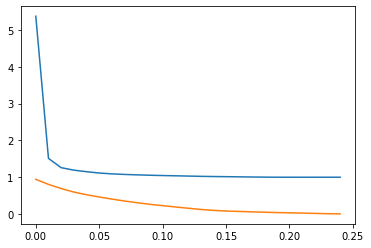

In [120]:
import matplotlib.pyplot as plt
plt.plot(lasso_set['rmse'])
plt.plot(lasso_set['r2'])

# 엘라스틱 넷의 rmse, 결정계수 그래프

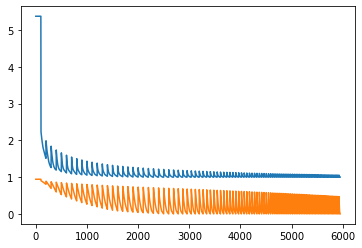

In [79]:
plt.plot(ela[['rmse','r2']])

# 엘라스틱넷의 사용된 변수개수 그래프

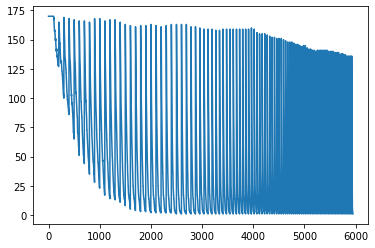

In [124]:
plt.plot(ela['number'])

# RQ1 결론

전진선택법, 후진소거법, 단계선택법이 세가지 중에서 단계선택법이 RMSE도 가장낮고, 사용하는 변수도 적고, 결정계수도 준수한 모습을 보여주었다.

만약 위 데이터셋처럼 데이터의 차원이 크고 결정계수가 아닌 RMSE를 최소화 하는것이 목표라면 단계선택법을 선택해야하며, 결정계수를 높이기 위한 목적으로 모델을 훈련시킨다면 전진선택법을 사용해야 한다.

또한, 라쏘, 엘라스틱 넷의 경우는 위에 언급한 세 가지 방법들보다 뛰어난 모습을 보여준다. 하지만 이때, 알파값의 세밀한 조정이 필요하며 특히 엘라스틱넷의 경우는 제약 항이 두개여서 시간적인 비용이 더 소모가 된다. 하지만 그래프에서 볼 수 있듯이, RMSE가 낮고 결정계수가 높은 구간이 엘라스틱넷에서는 존재한다.

그러므로 적절한 알파값과 L1_RATIO값을 위에 써놓은 코딩을 통해 도출하여서 결과적으로는 엘라스틱 넷이 모든 방법들중에 시간이라는 비용은 많이 들지만 가장 설명력 높은 모델이며, 가장 데이터셋의 정보를 많이 활용하는 유연한 모델임을 알 수 있었다. 그렇기 때문에 이에 따른 변수를 선택하고 머신러닝 모델에 활용하는 것은 유연함과 동시에 효율적인 변수선택법이 될 수 있음을 알 수 있다.

# RQ2. 타이타닉호 승객 데이터를 활용하여 어떤 유형의 승객의 생존율이 높은지 분석하기 위해서 관련성이 높은 변수는 무엇일까?

캐글의 가장 유명한 데이터셋중 하나인 타이타닉 데이터를 활용해서 어떤 승객이 생존율이 높은지 예측하는 과정이다.

이를 위해서 어떤 변수를 선택해야 효율적일지 알아보기 위해 각 변수와 Survived라는 타겟변수간의 관계를 살펴본다.

이에 연관이 없는 변수는 제거하고, 연관이 있는 변수는 활용하여 예측 및 분석에 이용할 수 있다.

# 데이터 불러오기

Pclass - 승객의 좌석 등급(범주형)

SibSp- 형제 자매 수(이산형), 

Parch - 부모와 자식 수(이산형)

Cabin - 좌석 번호(혼합)

Embarked - 승선 장소(범주형, 3가지 타입)



In [128]:
train=pd.read_csv('./train (2).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 범주형 데이터만 모아주기

In [129]:
train=train[['Survived','Pclass','Sex','Embarked']]
train

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
886,0,2,male,S
887,1,1,female,S
888,0,3,female,S
889,1,1,male,C


# 데이터 결측값 확인

In [130]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Embarked    2
dtype: int64

# 결측값 제거

In [131]:
train=train.dropna()
train

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
886,0,2,male,S
887,1,1,female,S
888,0,3,female,S
889,1,1,male,C


# 데이터 리인덱싱

In [132]:
train=train.reset_index()
train=train.drop(['index'],axis=1)
train

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S
...,...,...,...,...
884,0,2,male,S
885,1,1,female,S
886,0,3,female,S
887,1,1,male,C


# 범주형 데이터를 숫자로 변환해주기

In [133]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
category=encoder.fit_transform(train[['Sex','Embarked']])
category=pd.DataFrame(category)
category.columns=['Sex','Embarked']
category

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
884,1.0,2.0
885,0.0,2.0
886,0.0,2.0
887,1.0,0.0


In [134]:
train['Sex']=category['Sex']
train['Embarked']=category['Embarked']
train

,Survived,Pclass,Sex,Embarked
0,0,3,1.0,2.0
1,1,1,0.0,0.0
2,1,3,0.0,2.0
3,1,1,0.0,2.0
4,0,3,1.0,2.0
...,...,...,...,...
884,0,2,1.0,2.0
885,1,1,0.0,2.0
886,0,3,0.0,2.0
887,1,1,1.0,0.0


# 카이제곱 검정을 위한 분할표 생성 및, 카이제곱 검정 실시

귀무가설 : 두 변수는 독립이다.(연관이 없다.)

대립가설 : 두 변수는 종속이다.(연관이 있다.)

#승객의 좌석 등급 & Survived

In [135]:
from scipy.stats import chi2_contingency
chi_data=pd.crosstab(index=train.Pclass, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts )
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Pclass')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 Pclass는 관계가 있다.')


Survived and Pclass

chi 스퀘어 값: 100.98040726128336
p-value (0.05): 1.1813624785477922e-22
자유도 수: 2
기대값: 
            0           1
0  132.155231   81.844769
1  113.628796   70.371204
2  303.215973  187.784027
측정값: 
Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 Pclass는 관계가 있다.


#승객의 성별 & Survived

In [136]:
chi_data=pd.crosstab(index=train.Sex, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts )
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Sex')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 성별은 관계가 있다.')


Survived and Sex

chi 스퀘어 값: 258.4266104463763
p-value (0.05): 3.7799096665576e-58
자유도 수: 1
기대값: 
            0           1
0  192.674916  119.325084
1  356.325084  220.674916
측정값: 
Survived    0    1
Sex               
0.0        81  231
1.0       468  109
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 성별은 관계가 있다.


#승객의 승선역 & Survived

In [137]:
chi_data=pd.crosstab(index=train.Embarked, columns=train.Survived,values=train.Survived, aggfunc=pd.value_counts)
chi_data=chi_data.fillna(0)
chi, p, dof, expected = chi2_contingency(chi_data)
if p <0.05:
  print('Survived and Embarked')
  print()
  print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{chi_data}", sep = "\n" )
  print('p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 승선장소간의 관계가 있다.')


Survived and Embarked

chi 스퀘어 값: 26.48914983923762
p-value (0.05): 1.769922284120912e-06
자유도 수: 2
기대값: 
            0           1
0  103.748031   64.251969
1   47.551181   29.448819
2  397.700787  246.299213
측정값: 
Survived    0    1
Embarked          
0.0        75   93
1.0        47   30
2.0       427  217
p-value가 0.05 이하 이므로, 귀무가설을 기각한다. 즉, 생존과 승선장소간의 관계가 있다.


# 결론적으로는 Pclass, Sex, Embakred는 모두 Survived와 관계가 있기 때문에 다음의 예측및 분석에서 이 변수들을 활용할 수 있다.

또한, 성별의 경우에는 p-value가 가장 낮게 나왔는데 이는 귀무가설을 지지하는 정도가 가장 약하다는 것이므로, 성별이 특히 생존과 관련이 높았음을 알 수 있다.

# Team Review

이번 실습을 진행하면서 가장 흥미로웠던 것은 170개정도의 변수가 오히려 몇몇개의 변수가 있었을 때보다 설명력도 낮고 효율적이지 않은 모델인것을 직접 겪게 되니 변수선택은 데이터 분석의 시작에 있어서 가장 중요한 부분이라고 느끼게 되었다. 특히, 전진선택법 부터 엘라스틱 넷 변수선택법 까지 그리고 이 외에도 다양한 변수선택법이 있지만, 어떤 데이터셋을 활용하고 어떠한 목표를 갖고, 어떠한 상황속에서 분석을 실시하느냐에 따라서 과정과 결과가 많이 달라질 것 같다고 느꼈다. 그렇기 때문에 다른 변수선택법의 탐구의 필요성도 절실히 느끼게 되었다.

카이제곱검정의 경우에는 비교적 단순한 편이었지만, 범주형을 수치화시켜서 자료간의 독립성 검정여부를 따지는것이 가장 흥미로웠다.성별이 생존에 가장 영향을 주었다는 결과에서, 실제로도 타이타닉 침몰사건과 같은 위급상황이면 노약자와 여성분들을 우선순위로 챙기는 상황이 많기 때문에 어찌보면 당연한 결과라고도 할 수 있지만 직접 분석을 통해 이를 밝혀냈다는 점이 가장 인상깊기도 했다.
카이제곱검정 뿐만이 아니라, 오즈비 검정, 로짓 모형 등과같은 분석도 많이 경험을 해보고 싶다는 생각도 들었다.

# 데이터 출처 : Kaggle

변수선택데이터 : Don't overfit!!, Kaggle
카이제곱검정데이터 : Titanic, Kaggle